In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
# importing important LIberaries
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from collections import Counter
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.svm import SVC
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=Warning)

In [3]:
# Loading data
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [4]:
# shape of data
df.shape

(569, 33)

In [5]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Checking null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

> As we can see that the last column Unnamed: 32 has all NaN value so we will drop this column

In [7]:
# Droping Unnamed: 32 Column
df.drop('Unnamed: 32', axis = 1, inplace = True)

In [8]:
# Describing the data // Statistical Data analysis
pd.set_option('precision',5)
df.describe()

id  radius_mean  texture_mean  perimeter_mean   area_mean  \
count  5.69000e+02    569.00000     569.00000       569.00000   569.00000   
mean   3.03718e+07     14.12729      19.28965        91.96903   654.88910   
std    1.25021e+08      3.52405       4.30104        24.29898   351.91413   
min    8.67000e+03      6.98100       9.71000        43.79000   143.50000   
25%    8.69218e+05     11.70000      16.17000        75.17000   420.30000   
50%    9.06024e+05     13.37000      18.84000        86.24000   551.10000   
75%    8.81313e+06     15.78000      21.80000       104.10000   782.70000   
max    9.11321e+08     28.11000      39.28000       188.50000  2501.00000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count        569.00000         569.00000       569.00000            569.00000   
mean           0.09636           0.10434         0.08880              0.04892   
std            0.01406           0.05281         0.07972              0.03880   
min            0.05263           0.01938         0.00000              0.00000   
25%            0.08637           0.06492         0.02956              0.02031   
50%            0.09587           0.09263         0.06154              0.03350   
75%            0.10530           0.13040         0.13070              0.07400   
max            0.16340           0.34540         0.42680              0.20120   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count      569.00000  ...     569.00000      569.00000        569.00000   
mean         0.18116  ...      16.26919       25.67722        107.26121   
std          0.02741  ...       4.83324        6.14626         33.60254   
min          0.10600  ...       7.93000       12.02000         50.41000   
25%          0.16190  ...      13.01000       21.08000         84.11000   
50%          0.17920  ...      14.97000       25.41000         97.66000   
75%          0.19570  ...      18.79000       29.72000        125.40000   
max          0.30400  ...      36.04000       49.54000        251.20000   

       area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.00000         569.00000          569.00000        569.00000   
mean    880.58313           0.13237            0.25427          0.27219   
std     569.35699           0.02283            0.15734          0.20862   
min     185.20000           0.07117            0.02729          0.00000   
25%     515.30000           0.11660            0.14720          0.11450   
50%     686.50000           0.13130            0.21190          0.22670   
75%    1084.00000           0.14600            0.33910          0.38290   
max    4254.00000           0.22260            1.05800          1.25200   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count             569.00000       569.00000                569.00000  
mean                0.11461         0.29008                  0.08395  
std                 0.06573         0.06187                  0.01806  
min                 0.00000         0.15650                  0.05504  
25%                 0.06493         0.25040                  0.07146  
50%                 0.09993         0.28220                  0.08004  
75%                 0.16140         0.31790                  0.09208  
max                 0.29100         0.66380                  0.20750  

[8 rows x 31 columns]

# Data Visualization

B    357
M    212
Name: diagnosis, dtype: int64


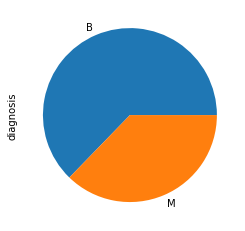

In [9]:
# Diagnosis Pie chart
print(df.diagnosis.value_counts())
df.diagnosis.value_counts().plot.pie();

***For All Data***

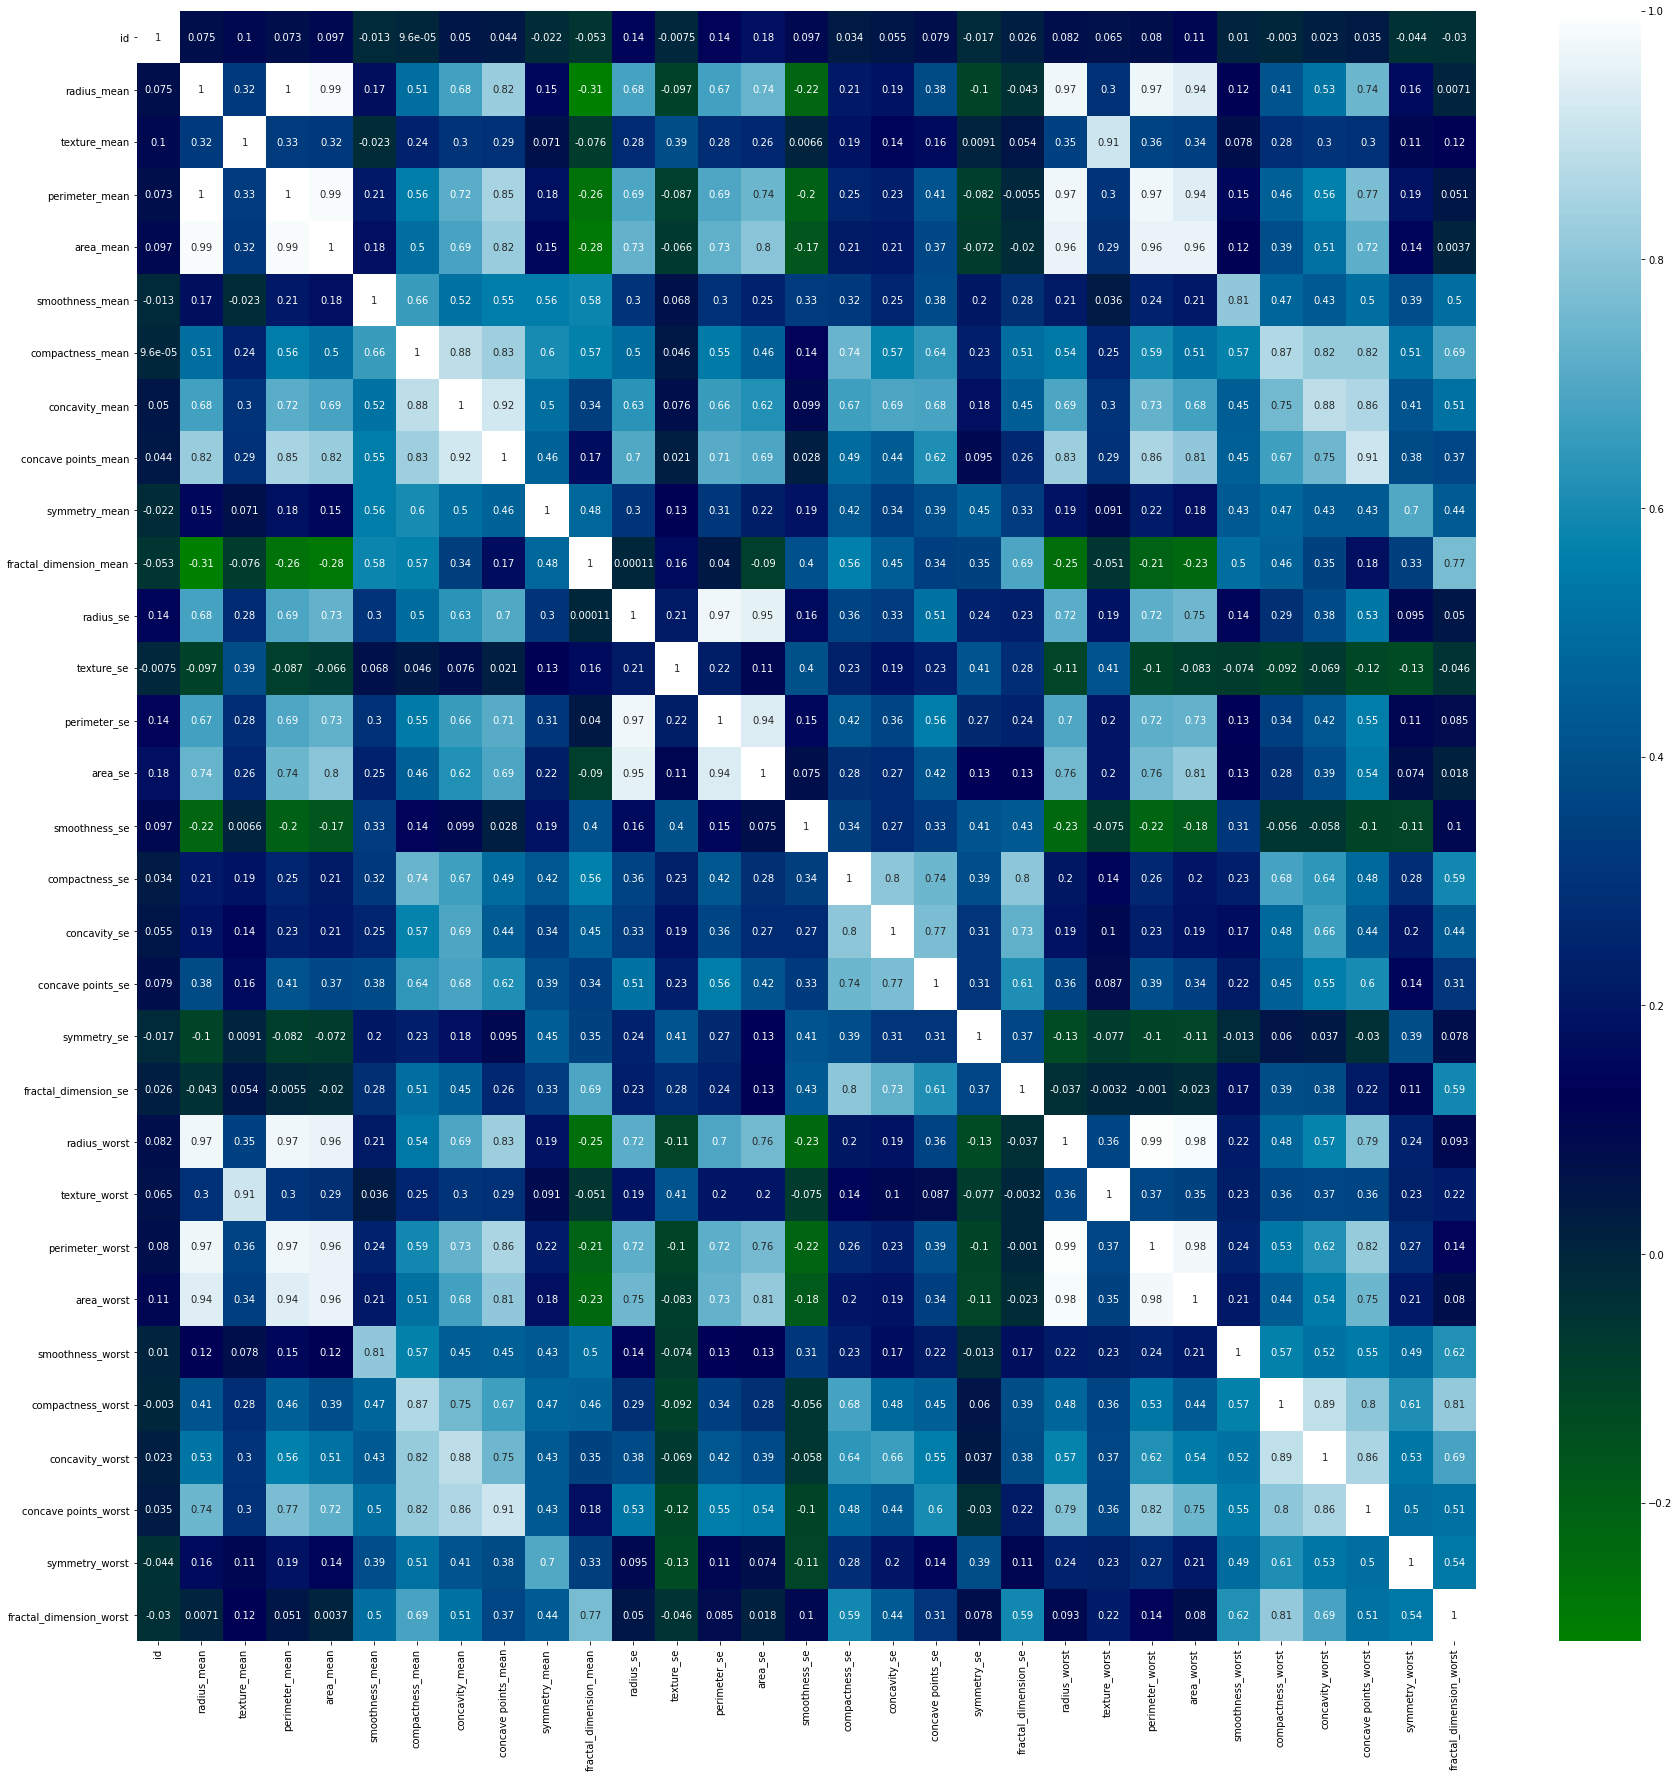

In [10]:
# Heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot = True, cmap = 'ocean');

In [11]:
# Getting Mean Columns
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
# Getting Se Columns
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']
# Getting Worst column
w_col = ['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

***For Mean Columns***

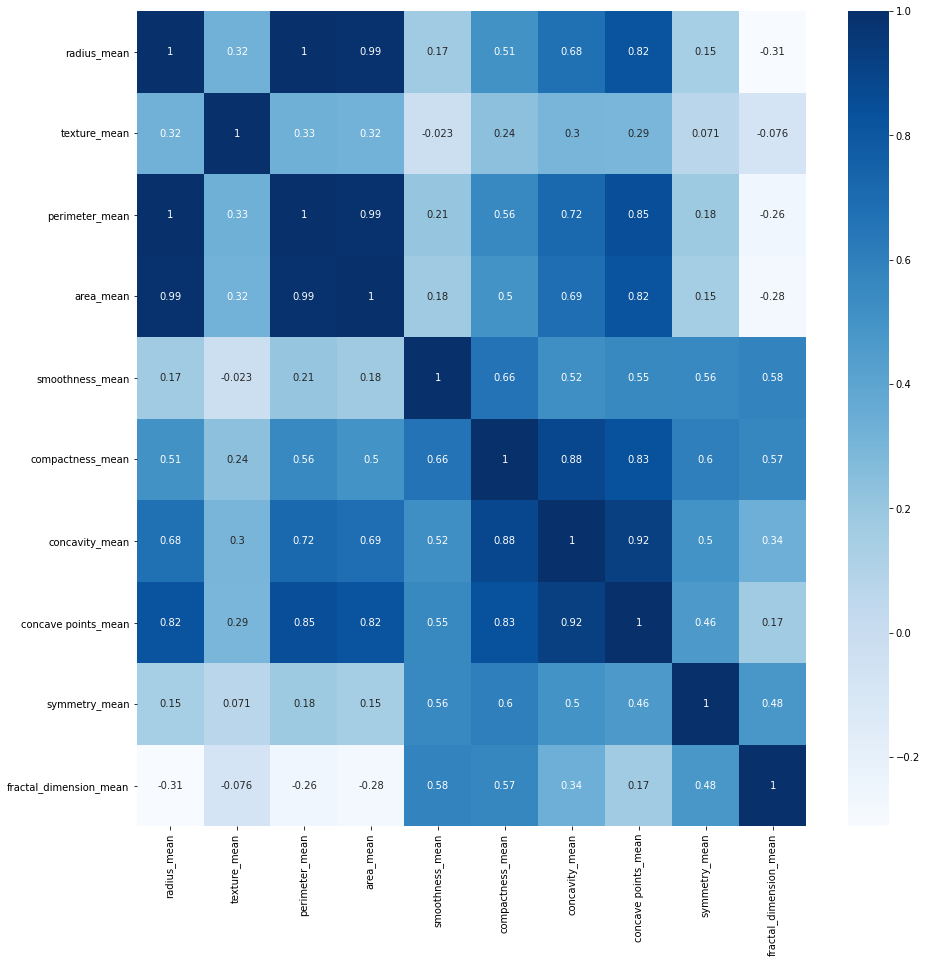

In [12]:
# Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df[m_col].corr(),annot = True, cmap = 'Blues');

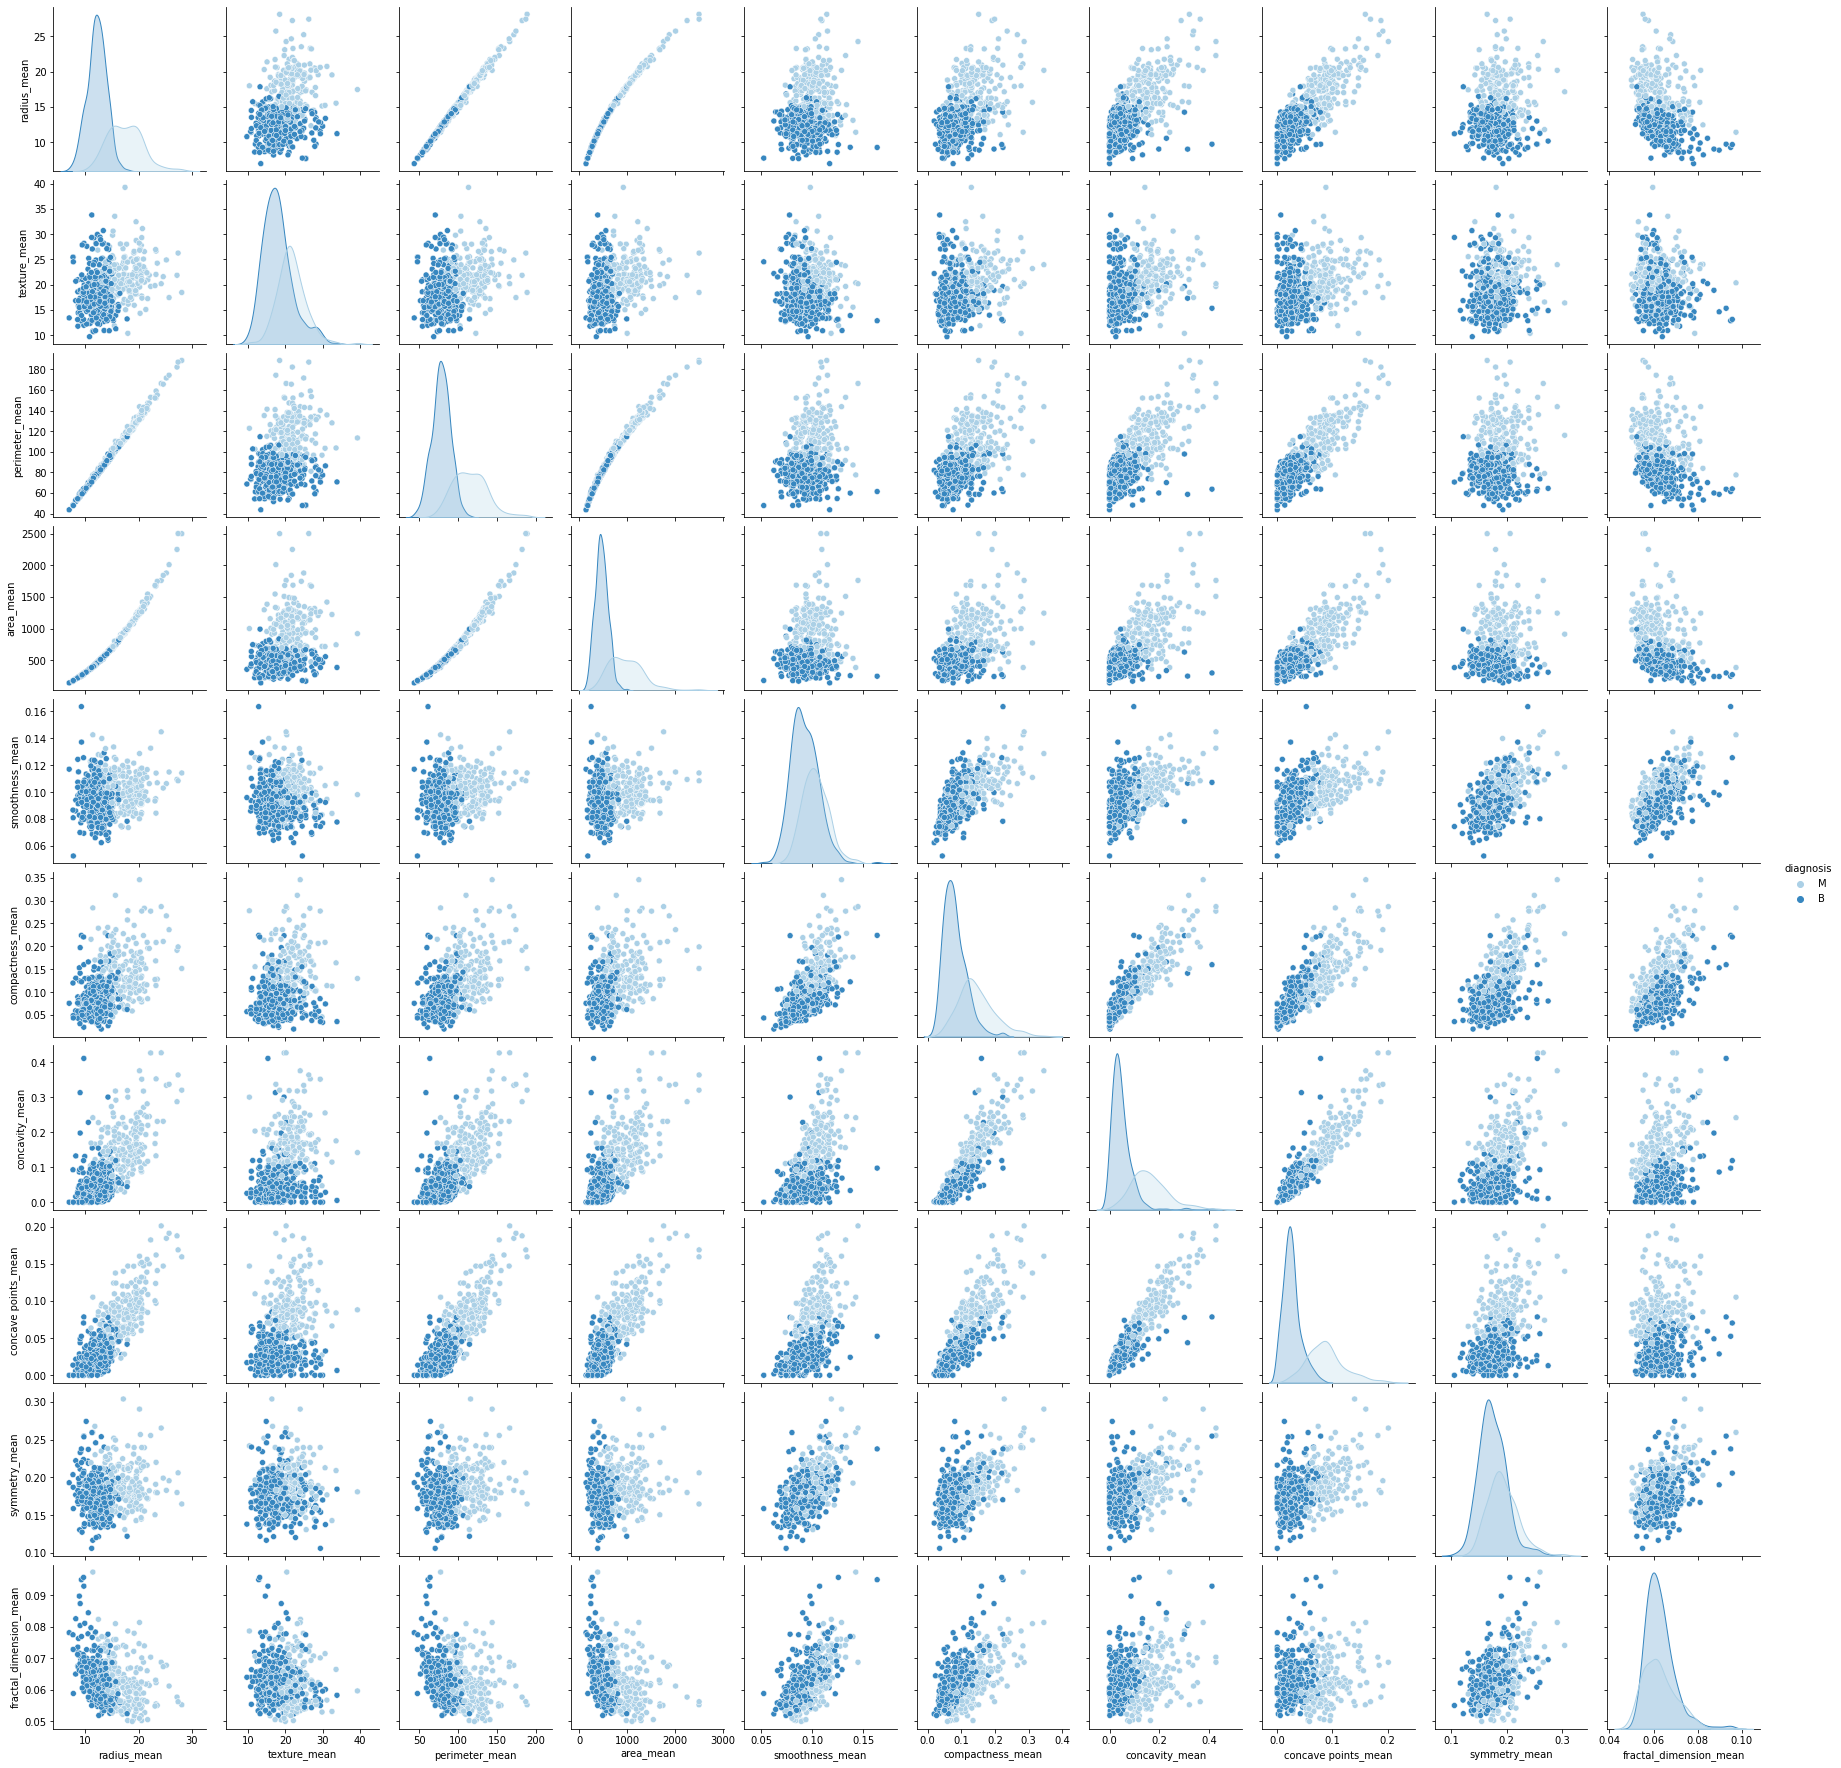

In [13]:
# pairplot for mean columns
sns.pairplot(df[m_col],hue = 'diagnosis', palette='Blues');

***For SE columns***

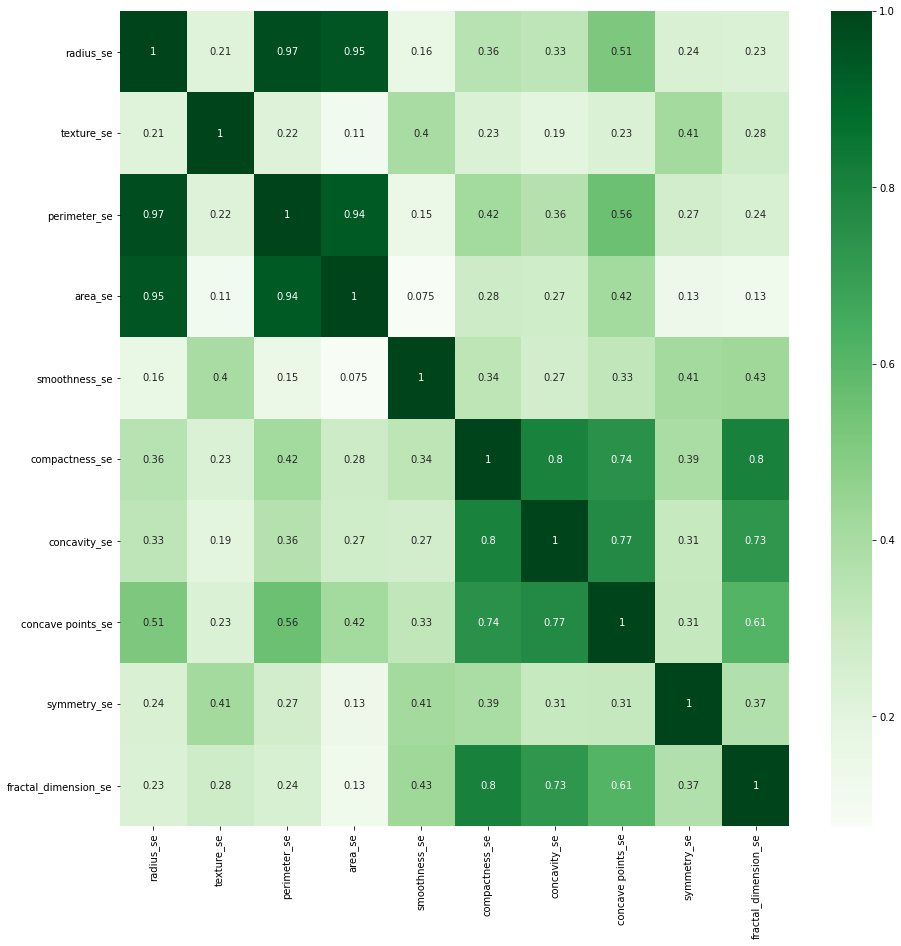

In [14]:
# Heatmap for se columns
plt.figure(figsize=(15,15))
sns.heatmap(df[s_col].corr(),annot = True, cmap = 'Greens');

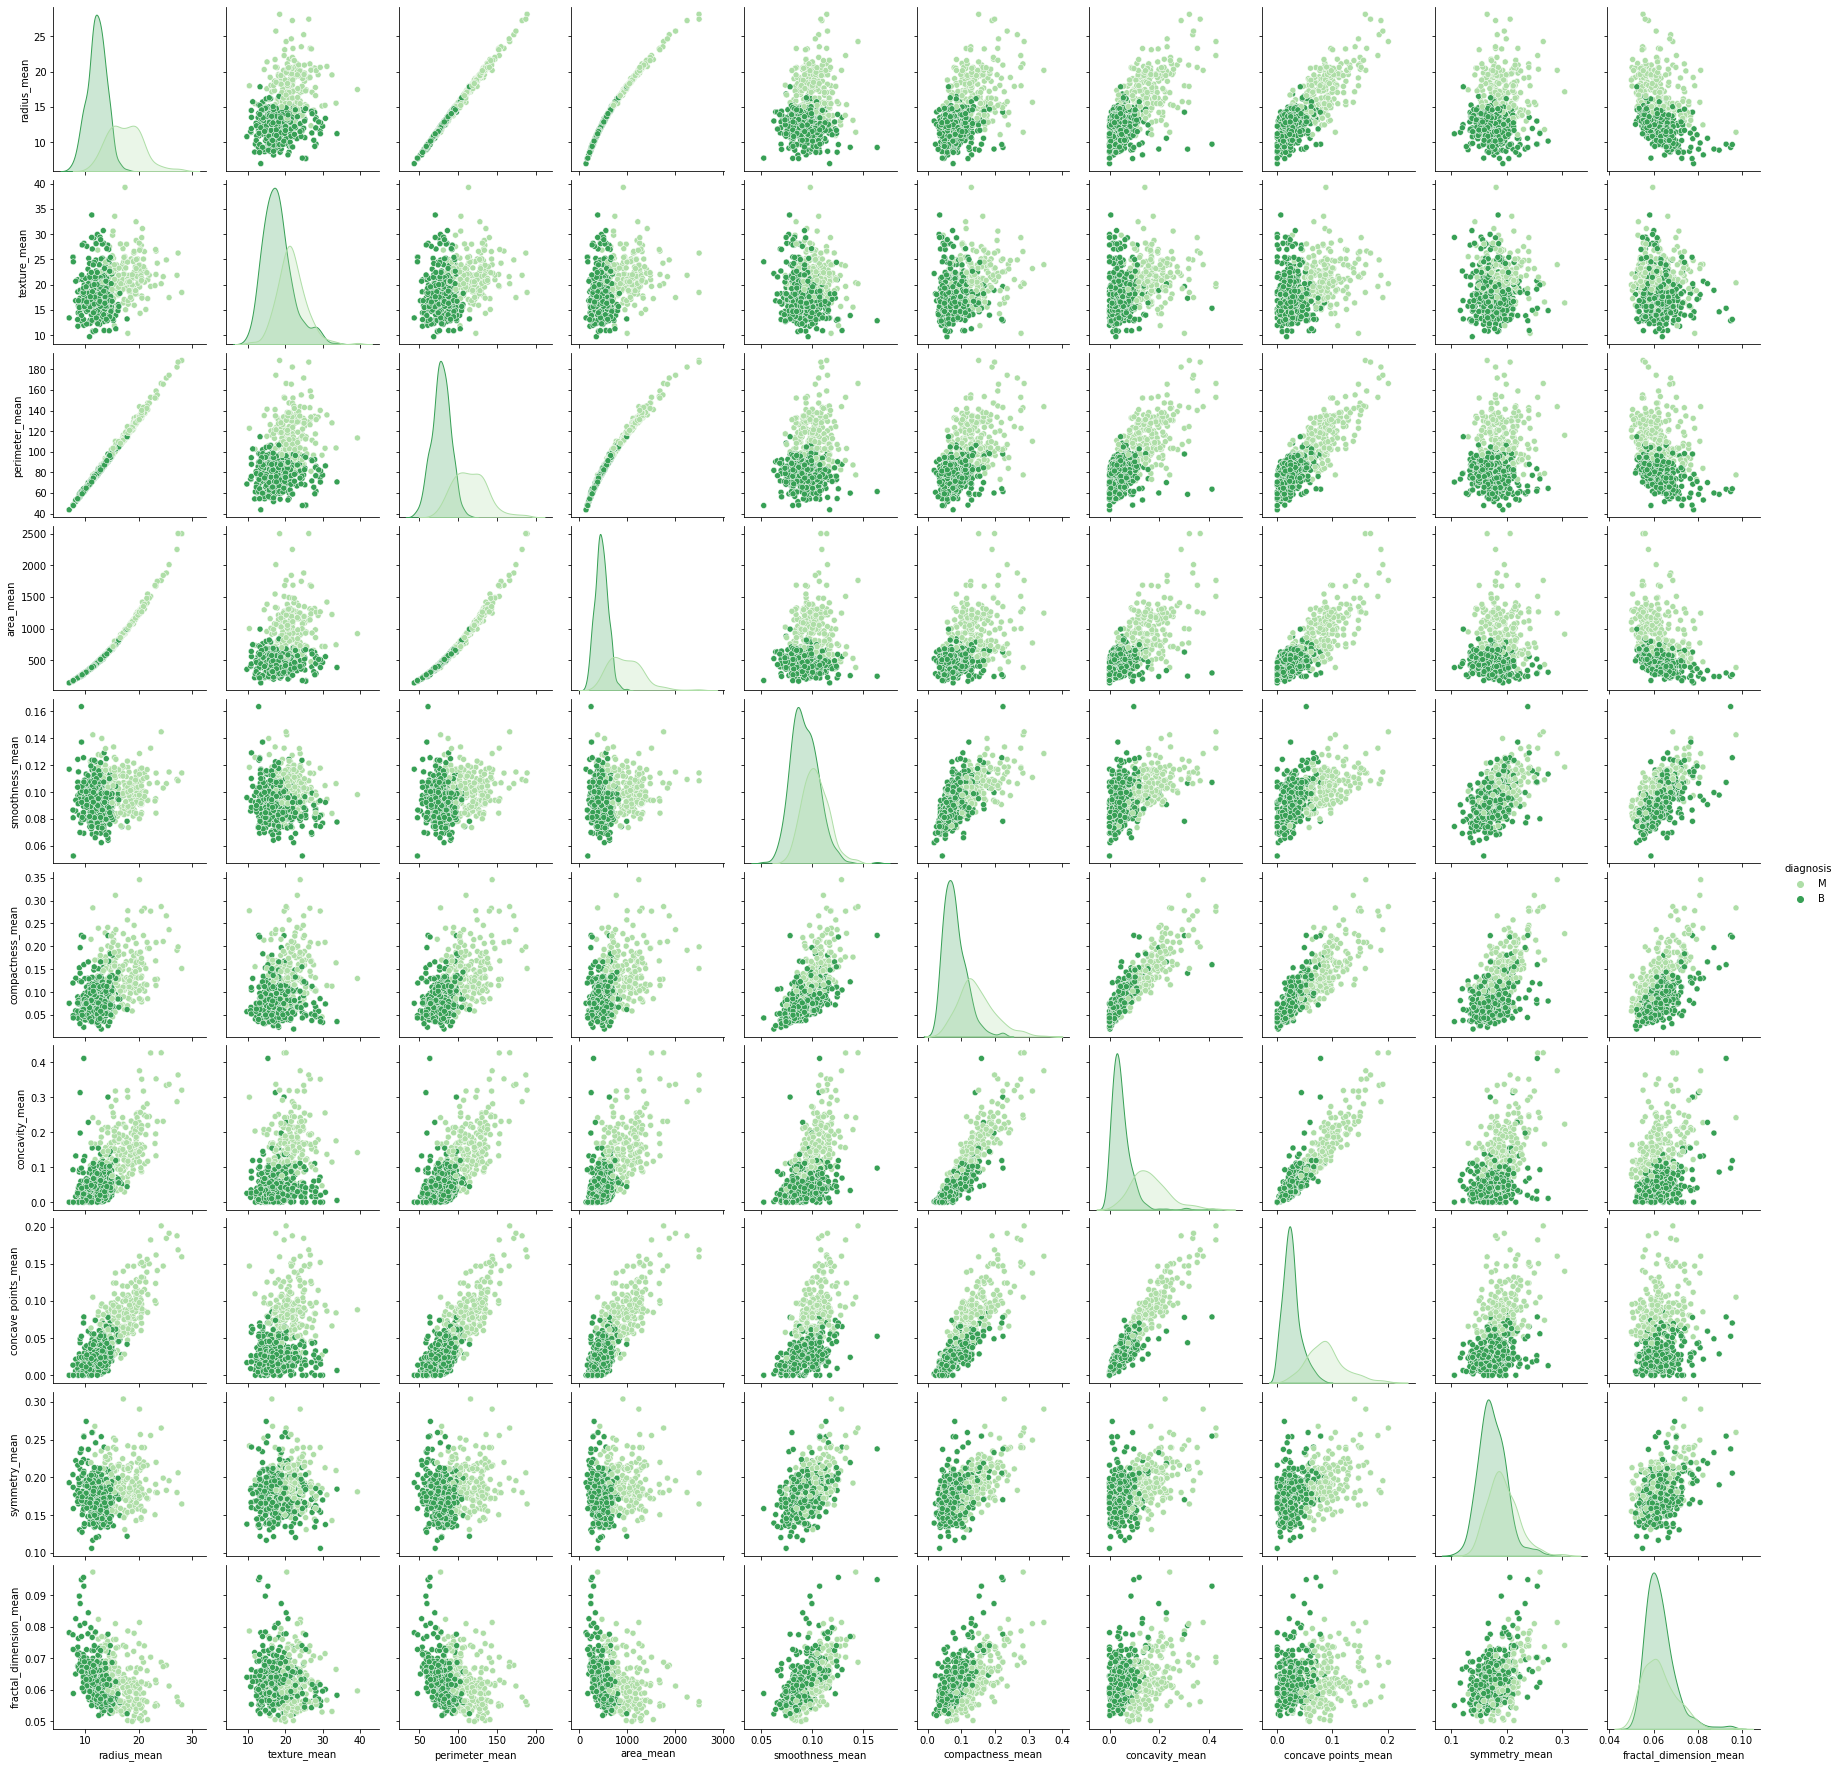

In [15]:
# pairplot for se columns
sns.pairplot(df[m_col],hue = 'diagnosis', palette='Greens');

***Worst columns***

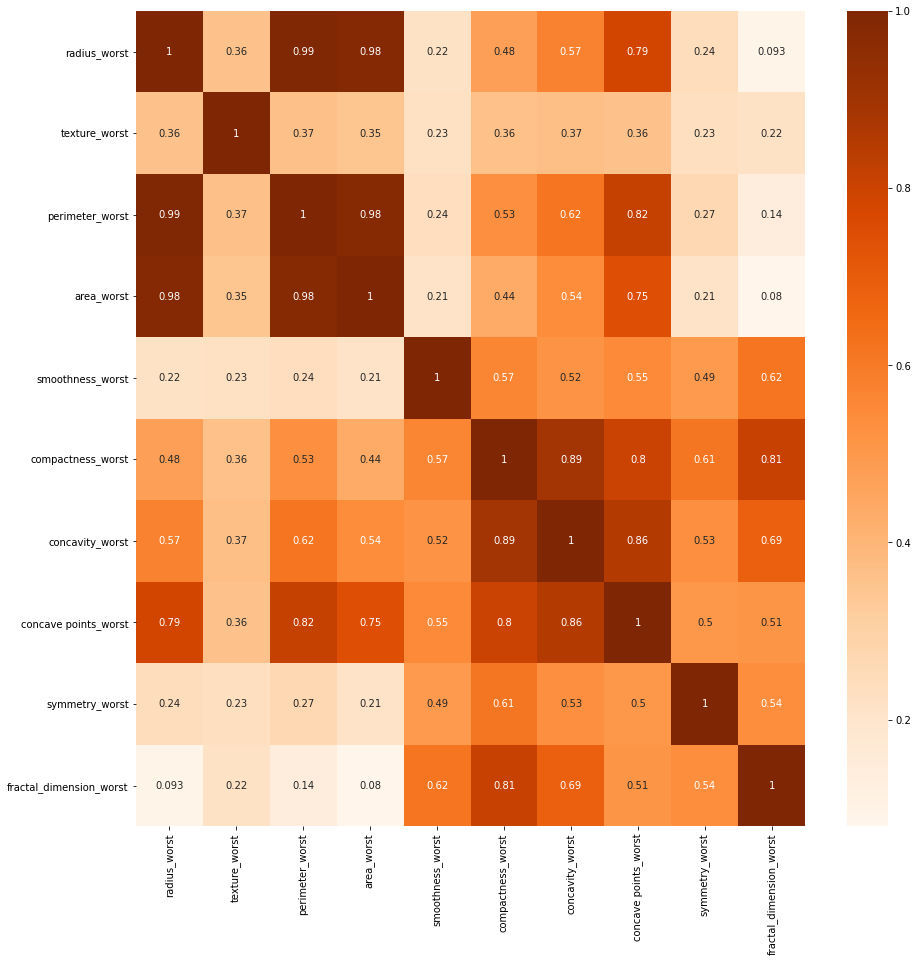

In [16]:
# Heatmap for Worst columns
plt.figure(figsize=(15,15))
sns.heatmap(df[w_col].corr(),annot = True, cmap = 'Oranges');

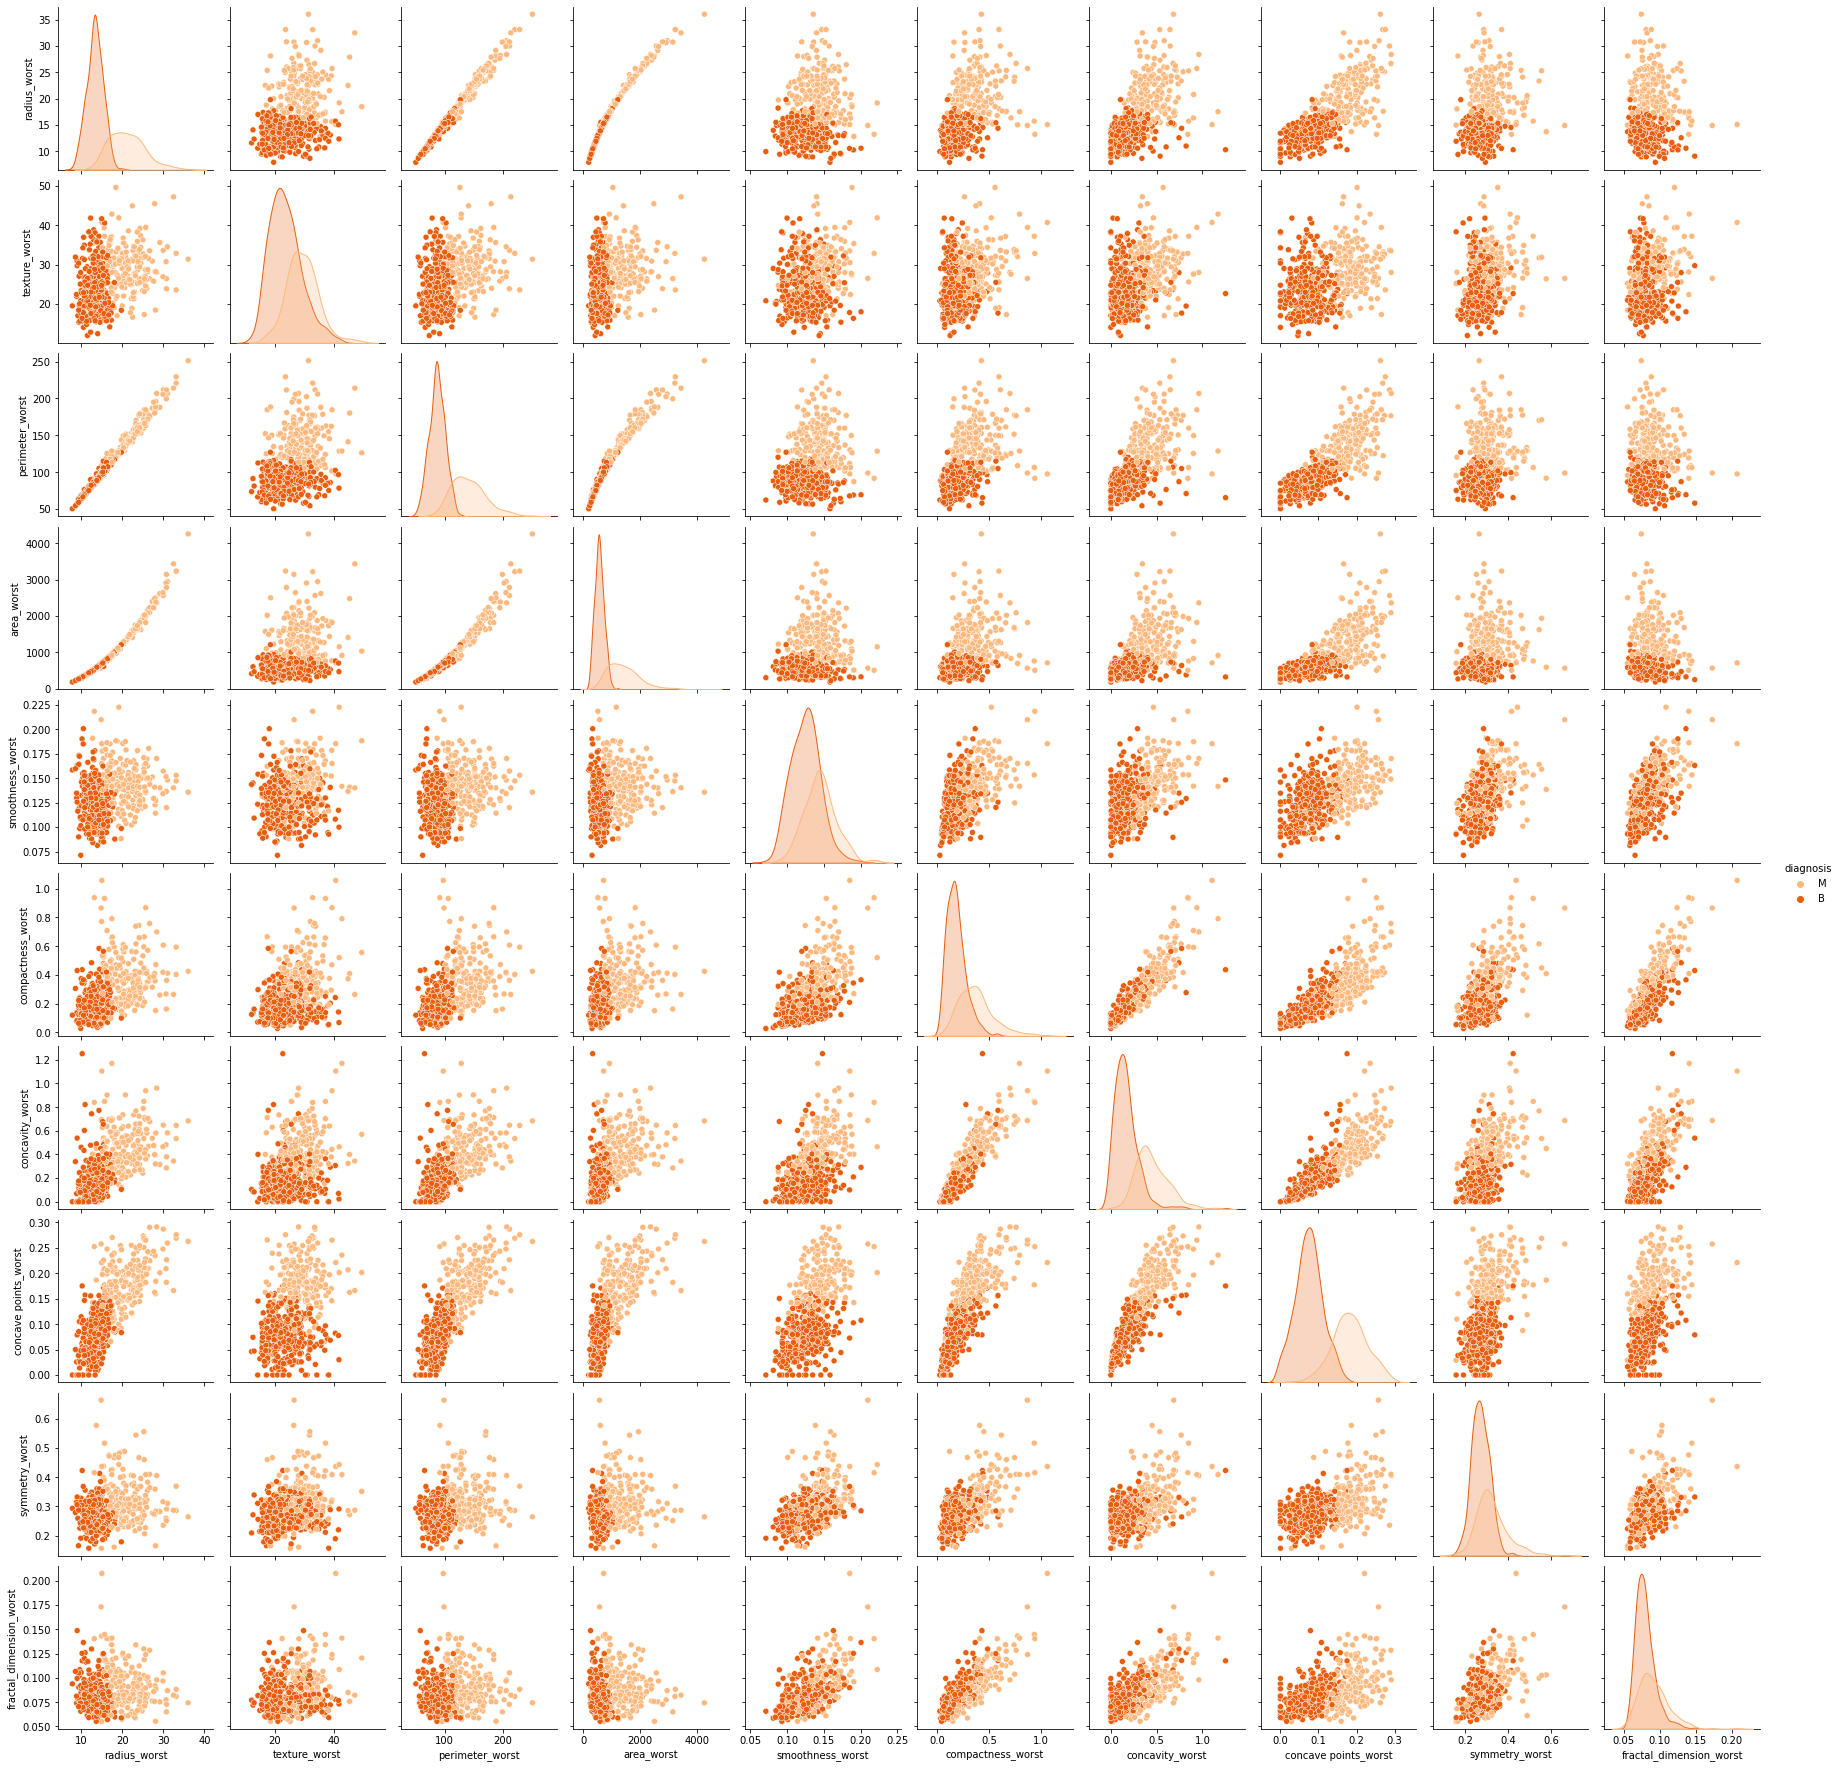

In [17]:
# pairplot for worst columns
sns.pairplot(df[w_col],hue = 'diagnosis', palette='Oranges');

# Data Modeling

In [18]:
# Getting Features
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
x = df[features]

# Getting Predicting Value
y = df['diagnosis']

In [19]:
def preprocessing(data,features,labels,test_size = 0.2,random_state =42, tune = 'n',cv_folds = 5):
    
    print('Checking if labels or features are categorical! [*]\n')
    cat_features=[i for i in features.columns if features.dtypes[i]=='object']
    if len(cat_features) >= 1 :
        index = []
        for i in range(0,len(cat_features)):
            index.append(features.columns.get_loc(cat_features[i]))
        print('Features are Categorical\n')
        ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), index)], remainder='passthrough')
        print('Encoding Features [*]\n')
        features = np.array(ct.fit_transform(features))
        print('Encoding Features Done [',u'\u2713',']\n')
    if labels.dtype == 'O':
        le = LabelEncoder()
        print('Labels are Categorical [*] \n')
        print('Encoding Labels \n')
        labels = le.fit_transform(labels)
        print('Encoding Labels Done [',u'\u2713',']\n')
    else:
        print('Features and labels are not categorical [',u'\u2713',']\n')
        
    ## SMOTE ---------------------------------------------------------------------
    print('Applying SMOTE [*]\n')
    
    sm=SMOTE(k_neighbors=4)
    features,labels=sm.fit_resample(features,labels)
    print('SMOTE Done [',u'\u2713',']\n')
    
    ## Splitting ---------------------------------------------------------------------
    print('Splitting Data into Train and Validation Sets [*]\n')
    
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size= test_size, random_state= random_state)
    print('Splitting Done [',u'\u2713',']\n')
    
    ## Scaling ---------------------------------------------------------------------
    print('Scaling Training and Test Sets [*]\n')
    
    sc = StandardScaler()
    X_train = sc.fit_transform(x_train)
    X_val = sc.transform(x_test)
    print('Scaling Done [',u'\u2713',']\n')
    
    print('Training All Basic Classifiers on Training Set [*] \n')
    
    parameters_svm= [
    {'kernel': ['rbf'], 'gamma': [0.1, 0.5, 0.9, 1],
        'C': np.logspace(-4, 4, 5)},
    ]
    parameters_lin = [{
    'penalty': ['l1', 'l2', ],
    'solver': ['newton-cg', 'liblinear', ],
    'C': np.logspace(-4, 4, 5),
    }]
    parameters_knn = [{
    'n_neighbors': list(range(0, 11)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'kd_tree', 'brute'],
    }]
    parameters_dt = [{
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [4,  6,  8,  10,  12,  20,  40, 70],

    }]
    parameters_rfc = [{
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 300, 500, 750, 1000],
    'max_features': [2, 3],
    }]
    parameters_xgb = [{
    'max_depth': [4,  6,  8,  10],
    'learning_rate': [0.3, 0.1],
    }]
    parameters_lgbm =  {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'boosting_type' : ['gbdt', 'dart'],
    'objective' : ['binary'],
    }
    paramters_pac = {
        'C': np.logspace(-4, 4, 20)},
    
    
    param_nb={}
    parameters_ada={
            'learning_rate': [0.005, 0.01],
            'n_estimators': [8,16,24],
    }
    paramters_sgdc = [{
    'penalty': ['l2', 'l1', 'elasticnet'],
    'loss': ['hinge', 'log'],
    'alpha':np.logspace(-4, 4, 20),
    }]
    models =[("LR", LogisticRegression(), parameters_lin),("SVC", SVC(),parameters_svm),('KNN',KNeighborsClassifier(),parameters_knn),
    ("DTC", DecisionTreeClassifier(),parameters_dt),("GNB", GaussianNB(), param_nb),("SGDC", SGDClassifier(), paramters_sgdc),('RF',RandomForestClassifier(),parameters_rfc),
    ('ADA',AdaBoostClassifier(),parameters_ada),('XGB',GradientBoostingClassifier(),parameters_xgb),('LGBN', LGBMClassifier(),parameters_lgbm),
    ('PAC',PassiveAggressiveClassifier(),paramters_pac)]

    results = []
    names = []
    finalResults = []
    accres = []

    for name,model, param in models:
        
        model.fit(x_train, y_train)
        model_results = model.predict(x_test)
        accuracy = accuracy_score(y_test, model_results)
        print('Validation Accuracy is :',accuracy)
        print('Applying K-Fold Cross validation on Model {}[*]'.format(name))
        accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=cv_folds, scoring='accuracy')
        print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
        acc = accuracies.mean()*100
        print("Standard Deviation: {:.2f} %".format(accuracies.std()*100)) 
        results.append(acc)
        names.append(name)
        accres.append((name,acc))
        if tune == 'y' and not name == 'GNB':
            print('Applying Grid Search Cross validation for model {} []\n'.format(name))
            cv_params = param
            grid_search = GridSearchCV(
            estimator=model,
            param_grid=cv_params,
            scoring='accuracy',
            cv=cv_folds,
            n_jobs=-1,
            verbose=4,
                )
            grid_search.fit(X_train, y_train)
            best_accuracy = grid_search.best_score_
            best_parameters = grid_search.best_params_
            print("Best Accuracy for model {}: {:.2f} %".format(name,best_accuracy*100))
            print("Best Parameters: for model {}".format(name), best_parameters)
            print('Applying Grid Search Cross validation Done[',u'\u2713',']\n')
            
        print('Training Compeleted Showing Predictions [',u'\u2713','] \n')
    accres.sort(key=lambda k:k[1],reverse=True)
    print("\n The Accuracy of the Models Are:\n ")
    tab = pd.DataFrame(accres)
    print(tab)
    sns.barplot(x=tab[1], y=tab[0], palette='mako');
    print("\n\nModel With Highest Accuracy is: \n",accres[0],'\n\n')

Checking if labels or features are categorical! [*]

Labels are Categorical [*] 

Encoding Labels 

Encoding Labels Done [ ✓ ]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training All Basic Classifiers on Training Set [*] 

Validation Accuracy is : 0.951048951048951
Applying K-Fold Cross validation on Model LR[*]
Accuracy: 94.92 %
Standard Deviation: 1.29 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.8811188811188811
Applying K-Fold Cross validation on Model SVC[*]
Accuracy: 90.89 %
Standard Deviation: 3.03 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.9020979020979021
Applying K-Fold Cross validation on Model KNN[*]
Accuracy: 94.05 %
Standard Deviation: 2.25 %
Training Compeleted Showing Predictions [ ✓ ] 

Validation Accuracy is : 0.9370629370629371
Applying K-Fold Cross validation on Model DTC[*]
Acc

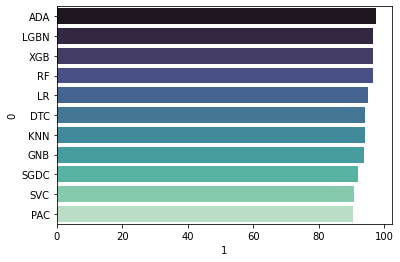

In [20]:
preprocessing(df,x,y)

# Summary
* ***LightGBN was the best here with the accuracy of 97%***

# Please do leave your valuable feedbacks in the comments and any improvements or suggestions are welcomed!!!!
***Dont forgot to upvote :)***